# Forecast the sales for 1 year for the furniture products category on the basis of the historical data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.chdir("/content/drive/MyDrive/ML/Supervised/Time series")

In [5]:


#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [6]:
#Importing the data
df=pd.read_excel(r'Sample - Superstore.xls',header=0)

In [7]:
#printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.shape

(9994, 21)

In [9]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [10]:
furniture = df[df['Category']=='Furniture']
furniture.shape

(2121, 21)

In [11]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [12]:
#if date/time is not in datetime formate to convert it 

#furniture['order Date']=pd.to_datetime(furniture['Order Date'])



In [13]:
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [14]:
furniture=furniture[["Order Date","Sales"]]
furniture.shape

(2121, 2)

In [15]:
furniture = furniture.sort_values('Order Date',ascending=True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [16]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [17]:
#to check koi same date kuch aur toh nhi hai

furniture["Order Date"].value_counts()

2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: Order Date, Length: 889, dtype: int64

In [18]:


furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index() #reset index bcz wo sum kar dega same date data ko if 3vales tha same day to wo sab ek mai aajaega
furniture.shape

(889, 2)

In [19]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [20]:
furniture = furniture.set_index('Order Date')

In [21]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [22]:
y = furniture['Sales'].resample("W").mean() #resample only work with datetime is
                                            # week (in days some day was not prresent) so we take week bcz all weeks are present 

In [23]:
print(y.shape)
y

(208,)


Order Date
2014-01-12     678.107000
2014-01-19     312.618250
2014-01-26     551.986000
2014-02-02     311.833000
2014-02-09      14.560000
                 ...     
2017-12-03    2286.881714
2017-12-10    1465.734000
2017-12-17     773.303167
2017-12-24    1212.340500
2017-12-31    1009.391200
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

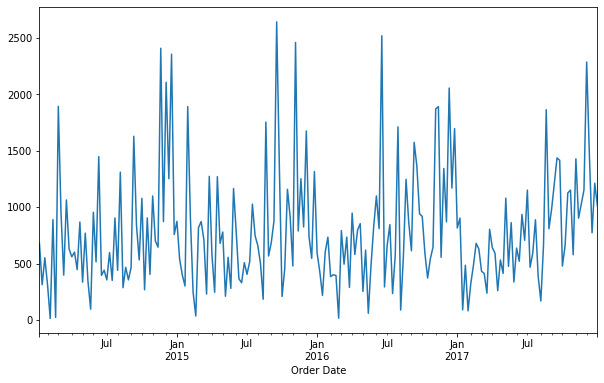

In [24]:
y.plot(figsize=(10,6))
plt.show()

In [25]:
y = furniture['Sales'].resample("M").mean() #to notics trend we use M

In [26]:
print(y.shape)
y

(48,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

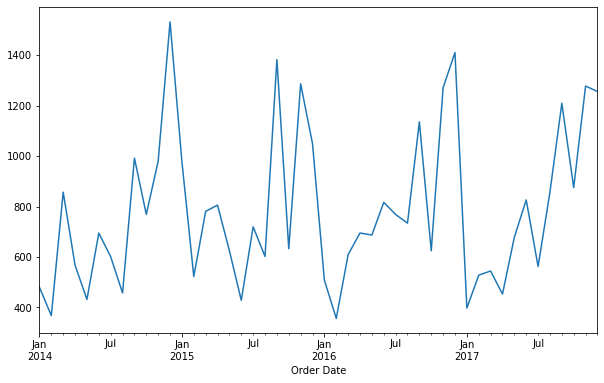

In [27]:
y.plot(figsize=(10,6))
plt.show()

In [28]:
train = y.loc[:'2016-12-31']
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [29]:
test=y.loc['2017-01-31':]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

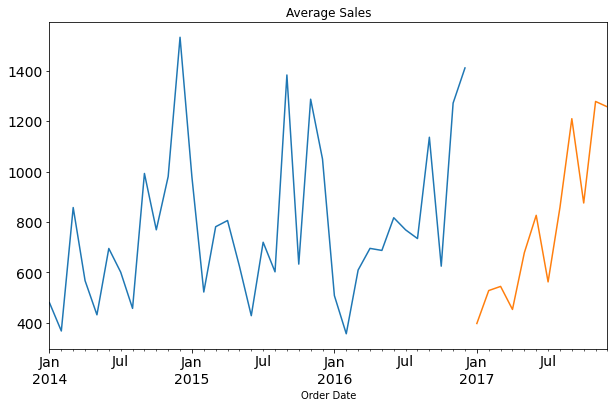

In [30]:
#Plotting data

train.plot(figsize=(10,6),title="Average Sales",fontsize=14)
test.plot(figsize=(10,6),title="Average Sales",fontsize=14)
plt.show() #is use to show them together

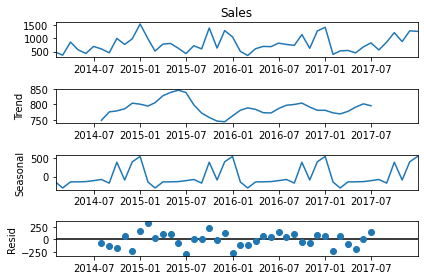

In [31]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()



In [32]:
#22/01/2022

In [33]:
#smiple exp smoothing

#smiple exp smoothing

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


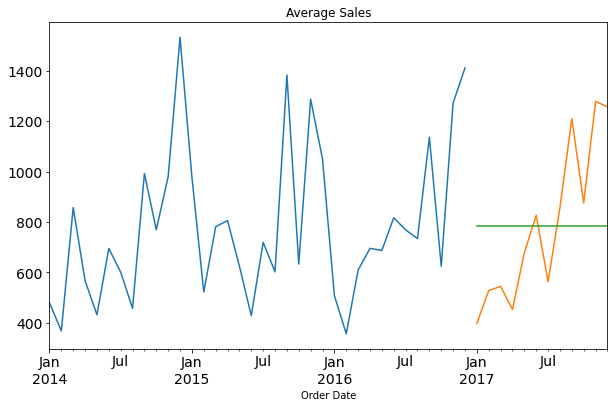

In [34]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 1 indicate that older values are very less imp compared to the recent values
#values close to 0 indicate that older values are also imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()


In [35]:
Exp_Smooth.SES 

2017-01-31    784.196438
2017-02-28    784.196438
2017-03-31    784.196438
2017-04-30    784.196438
2017-05-31    784.196438
2017-06-30    784.196438
2017-07-31    784.196438
2017-08-31    784.196438
2017-09-30    784.196438
2017-10-31    784.196438
2017-11-30    784.196438
2017-12-31    784.196438
Freq: M, dtype: float64

In [36]:
#AIC is used to compare different models with same Algo but differnt data/parameters 
#chose the model with Lowest AIC values 

fit1.aic

415.8766421604106

In [37]:
#RMSE is used to compare different models with same data but Algo 
#chose the model with Lowest RMSE values 

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rmse)

303.47669159034854


In [38]:
#holt linear tred model

#holt linear tred model



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-39-f65e399863e7>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train).fit(smoothing_level = 0.01,smoothing_slope = 0.01) #smoothing level
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


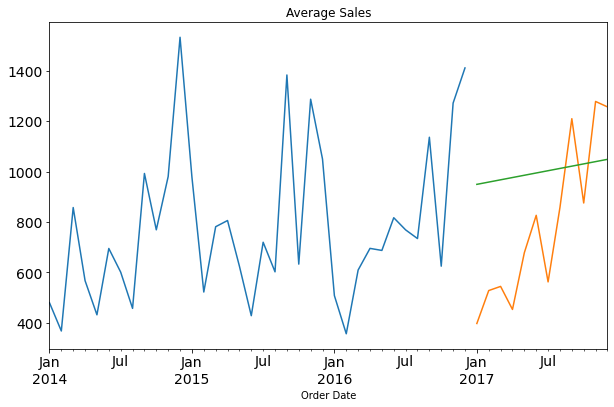

In [39]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.01,smoothing_slope = 0.01) #smoothing level 
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()



In [40]:
fit1.aic

416.3237611622847

In [41]:
Holt_df['Holt_linear']

2017-01-31     949.204322
2017-02-28     958.218571
2017-03-31     967.232819
2017-04-30     976.247068
2017-05-31     985.261316
2017-06-30     994.275565
2017-07-31    1003.289813
2017-08-31    1012.304061
2017-09-30    1021.318310
2017-10-31    1030.332558
2017-11-30    1039.346807
2017-12-31    1048.361055
Freq: M, dtype: float64

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_df['Holt_linear']))
print(rmse)

346.5634866807878


In [43]:
import numpy as np
my_dict={}
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        #print(fit1.aic,i,j)
        my_dict[i,j] = fit1.aic
 

 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-43-c0a184ce89fb>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)


In [44]:
for k in my_dict:
    if my_dict[k]==min(my_dict.values()):
        print(k,":",my_dict[k])

(0.01, 0.01) : 416.3237611622847


#triple exp smoothing

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


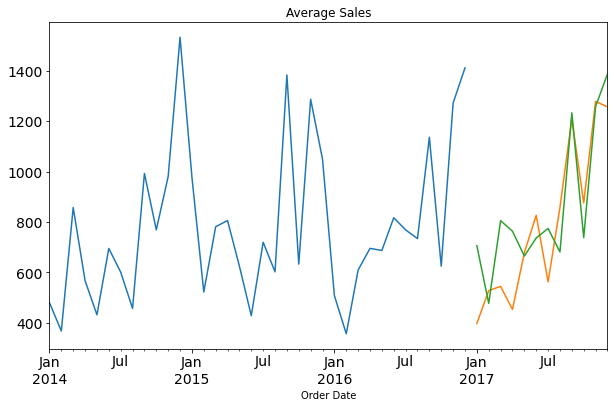

In [45]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()


In [46]:
#AIC is used to compare different models with same Algo but differnt data/parameters 
#chose the model with Lowest AIC values 

fit1.aic

399.1472320915374

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse)

178.65767569371693


In [48]:
Holt_Winter_df['Holt_Winter']

2017-01-31     705.960033
2017-02-28     477.388889
2017-03-31     805.383046
2017-04-30     763.381589
2017-05-31     664.941260
2017-06-30     736.594735
2017-07-31     774.349428
2017-08-31     681.147634
2017-09-30    1232.684316
2017-10-31     737.978361
2017-11-30    1257.261545
2017-12-31    1386.848798
Freq: M, dtype: float64

forcasting


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


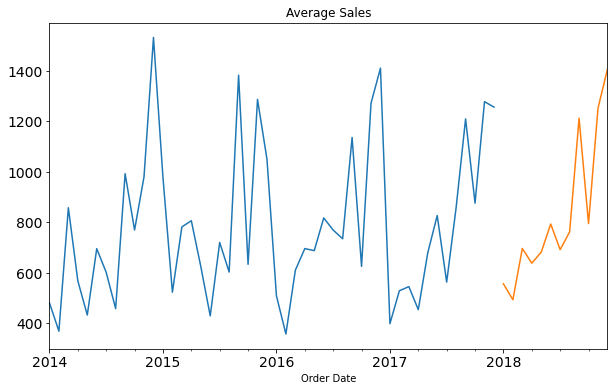

In [49]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
#Y_predictions = fit1.predict(start=pd.to_datetime('2017-01-31))
Y_predictions = fit1.forecast(steps=12)
 
y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)

Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()


In [50]:
Y_predictions["Total"]=Y_predictions.mean()

In [51]:
Y_predictions

2018-01-31 00:00:00     555.694823
2018-02-28 00:00:00     492.629918
2018-03-31 00:00:00     695.829382
2018-04-30 00:00:00     637.376731
2018-05-31 00:00:00     681.174483
2018-06-30 00:00:00     792.884595
2018-07-31 00:00:00     691.182619
2018-08-31 00:00:00     761.367917
2018-09-30 00:00:00    1211.998462
2018-10-31 00:00:00     794.568331
2018-11-30 00:00:00    1251.743717
2018-12-31 00:00:00    1406.625639
Total                   831.089718
dtype: float64

In [52]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx",header=["sales"],index=True)

In [57]:
pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
 """
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""



In [58]:
import pmdarima as pm

In [59]:
#idenfityfication face
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.07 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.19 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.19 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.24 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.09 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.25 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.84 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=1.78 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.45 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=1.72 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.63 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [60]:
model.aic()

489.41762612467454

In [61]:
#estimation 
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y, order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


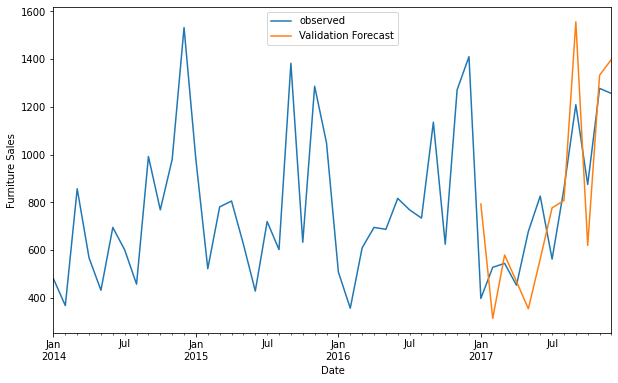

In [62]:
#valistation 

pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
#pred = model.get_forecast(steps=12)
 
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


In [63]:
pred.predicted_mean

Order Date
2017-01-31     792.949434
2017-02-28     314.265632
2017-03-31     579.803133
2017-04-30     468.932392
2017-05-31     354.687212
2017-06-30     562.948850
2017-07-31     777.172660
2017-08-31     807.929706
2017-09-30    1556.342090
2017-10-31     620.158822
2017-11-30    1332.648297
2017-12-31    1399.290959
Freq: M, Name: predicted_mean, dtype: float64

In [65]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-31':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

230.06285302819938


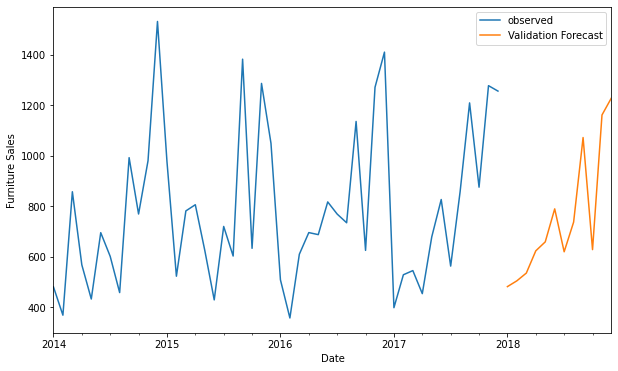

In [73]:
#forcasting

#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)
 
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


In [70]:
pred.predicted_mean

2018-01-31     481.175778
2018-02-28     504.162666
2018-03-31     534.896804
2018-04-30     623.058239
2018-05-31     658.537437
2018-06-30     789.387664
2018-07-31     619.269503
2018-08-31     736.930507
2018-09-30    1072.136407
2018-10-31     627.864085
2018-11-30    1161.662871
2018-12-31    1229.291142
Freq: M, Name: predicted_mean, dtype: float64

In [76]:
pred.predicted_mean.to_excel("TimeSeriesOutput1.xlsx",index=True)